In [1]:
# LIBRARIES USED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os

In [2]:
# CHANGING JUPYTER CURRENT WORKING DIRECTORY

os.chdir('C:\\Users\\DELL\\Downloads')
os.getcwd()

'C:\\Users\\DELL\\Downloads'

#   #              1. LOADING DATASETS

In [3]:
# IMPORTING DATA

df=pd.read_csv('tc20171021.csv',on_bad_lines='skip')
df1=pd.read_csv('true_car_listings.csv',on_bad_lines='skip')

   #            2. UNDERSTANDING THE DATA

In [4]:
print(df.head())

   Id  Price  Year  Mileage            City State                Vin   Make  \
0   1  16472  2015    18681  Jefferson City    MO  KL4CJBSBXFB267643  Buick   
1   2  15749  2015    27592        Highland    IN  KL4CJASB5FB245057  Buick   
2   3  16998  2015    13650           Boone    NC  KL4CJCSB0FB264921  Buick   
3   4  15777  2015    25195     New Orleans    LA  KL4CJASB4FB217542  Buick   
4   5  16784  2015    22800       Las Vegas    NV  KL4CJBSB3FB166881  Buick   

               Model  
0  EncoreConvenience  
1          EncoreFWD  
2      EncoreLeather  
3          EncoreFWD  
4  EncoreConvenience  


In [5]:
print(df1.head())

   Price  Year  Mileage              City State                Vin   Make  \
0   8995  2014    35725           El Paso    TX  19VDE2E53EE000083  Acura   
1  10888  2013    19606  Long Island City    NY  19VDE1F52DE012636  Acura   
2   8995  2013    48851           El Paso    TX  19VDE2E52DE000025  Acura   
3  10999  2014    39922           Windsor    CO  19VDE1F71EE003817  Acura   
4  14799  2016    22142            Lindon    UT  19UDE2F32GA001284  Acura   

          Model  
0    ILX6-Speed  
1    ILX5-Speed  
2    ILX6-Speed  
3    ILX5-Speed  
4  ILXAutomatic  


In [6]:
print(df.shape,df1.shape)

(1216250, 9) (852122, 8)


In [7]:
print(df.dtypes)

Id          int64
Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object


In [8]:
print(df1.dtypes)

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object


#              3. PREPROCESSING THE DATA

### 3.1 Removing Id column from 1st dataset (df)

In [9]:
df=df.iloc[:,1:]
print(df.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


## 3.2 Merging the two datasets

### 1. Did they having same features

In [10]:
print(df.columns==df1.columns)

[ True  True  True  True  True  True  True  True]


### 2. Did they have same unit of each feature

In [11]:
# THERE IS NO UNIT MENTIONED IN BOTH THE DATASETS OF COLUMN PRICE AND MILEAGE 
# SO ASSUMING THEY HAVE SAME UNIT

## 3. Are datasets distributed properly

In [12]:
# IN THIS WE USE SAMPLING TO IDENTIFY THAT OUR DATASET IS BIASED OR NOT

In [13]:
samp = df.sample(n=10)

In [14]:
samp1=df1.sample(n=10)

In [15]:
samp

,Price,Year,Mileage,City,State,Vin,Make,Model
294694,24985,2015,15153,Corpus Christi,TX,1N6AD0ER5FN724484,Nissan,FrontierCrew
886275,33606,2015,44724,Houston,TX,1C4HJWEG8FL621678,Jeep,Wrangler
831928,22827,2014,24464,Phoenix,AZ,JN1BV7AP3EM685838,INFINITI,Q50RWD
603732,15999,2015,31329,Hudson,WI,3FA6P0H71FR180899,Ford,FusionSE
306831,11995,2010,78734,Macomb,MI,JF2SH6CC1AH790424,Subaru,Forester4dr
507707,30500,2016,14832,Louisville,KY,1GCGTCE37G1195612,Chevrolet,ColoradoCrew
694939,9995,2007,161812,Montgomery,AL,1FMEU64807UA63448,Ford,Explorer2WD
903438,7997,2011,101477,San Diego,CA,5XYKT3A16BG007282,Kia,Sorento2WD
187168,21000,2011,71290,Beaverton,OR,WBAFU7C52BC879272,BMW,5
365451,5995,2007,174709,Simi Valley,CA,1HGFA168X7L078435,Honda,Civic


In [16]:
samp1

,Price,Year,Mileage,City,State,Vin,Make,Model
477411,42995,2014,40906,Bradenton,FL,JN8AZ2NF9E9551344,INFINITI,QX802WD
588149,9995,2010,105795,Dallas,TX,JM1BL1H37A1171814,Mazda,Mazda35dr
74342,21911,2014,57096,Colorado Springs,CO,1G6AX5SX0E0179027,Cadillac,CTS
500805,28995,2016,20788,Raynham,MA,1C4RJFAG2GC426722,Jeep,Grand
185409,54900,2015,40352,Fairfield,CA,1GC1KWE85FF627119,Chevrolet,Silverado
434091,13455,2017,17116,Pikeville,KY,5NPD74LF1HH139864,Hyundai,ElantraSE
82279,33902,2016,35807,Chesapeake,VA,2G61M5S36G9182996,Cadillac,XTSFWD
713552,27000,2011,64626,Colorado Springs,CO,1D7RV1CT9BS546135,Ram,15004WD
256195,15593,2015,12014,Bedford,OH,1FMCU0G72FUB52296,Ford,EscapeFWD
27460,15899,2007,28596,Englewood,CO,WBAVC73577KP35745,BMW,3


### Concating datasets

In [17]:
DF=pd.concat([df,df1])

In [18]:
DF.to_csv('final.csv')

In [19]:
print(DF.shape)

(2068372, 8)


# 3.3 Columns Types

In [20]:
print(DF.dtypes)

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object


# 3.4 Missing Data

In [21]:
for i in DF.columns:
    result=DF[i].isnull().to_numpy().nonzero()
    print(result)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


# # 3.5 Descriptive Analysis
3.5.1 Numerical Features Analysis
1
##### There are three numerical features -
2
##### 1. Price
3
##### 2. Year
4
##### 3. Mileage

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
DF=pd.read_csv('final.csv')
print(DF.head)

<bound method NDFrame.head of          Unnamed: 0  Price  Year  Mileage            City State  \
0                 0  16472  2015    18681  Jefferson City    MO   
1                 1  15749  2015    27592        Highland    IN   
2                 2  16998  2015    13650           Boone    NC   
3                 3  15777  2015    25195     New Orleans    LA   
4                 4  16784  2015    22800       Las Vegas    NV   
...             ...    ...   ...      ...             ...   ...   
2068367      852117  63215  2017        9     Culver City    CA   
2068368      852118  72260  2017     3201       Englewood    NJ   
2068369      852119  55999  2016    28941    Fort Collins    CO   
2068370      852120  60240  2017     3005     San Leandro    CA   
2068371      852121  76995  2017     2502        New York    NY   

                       Vin   Make              Model  
0        KL4CJBSBXFB267643  Buick  EncoreConvenience  
1        KL4CJASB5FB245057  Buick          EncoreFWD  


In [24]:
DF=DF.iloc[:,[1,2,3,4,5,6,7,8]]

In [25]:
set1=DF.iloc[:,[0,1,2]]

In [26]:
set1.head()

,Price,Year,Mileage
0,16472,2015,18681
1,15749,2015,27592
2,16998,2015,13650
3,15777,2015,25195
4,16784,2015,22800


# 3.5.1.2.1 Removing Duplicate Vins

In [27]:
DF.drop_duplicates(subset ='Vin',keep = False, inplace = True)

In [28]:
print(DF.shape)

(387401, 8)


### 3.5.1.2.2 Handling State names

In [29]:
print(DF.shape)

(387401, 8)


In [30]:
DF['State'].unique()

array([' IN', ' NY', ' CA', ' NC', ' TN', ' FL', ' TX', ' OK', ' GA',
       ' OH', ' AZ', ' LA', ' Fl', ' NJ', ' MD', ' IL', ' WI', ' PA',
       ' MA', ' KY', ' KS', ' RI', ' OR', ' AL', ' MS', ' MO', ' SC',
       ' AR', ' VA', ' IA', ' NH', ' MI', ' NE', ' CO', ' ME', ' VT',
       ' NV', ' UT', ' CT', ' WA', ' MN', ' NM', ' WY', ' WV', ' DE',
       ' ND', ' AK', ' ID', ' HI', ' Ga', ' SD', ' MT', ' ga', ' Va',
       ' Ca', ' Az', ' Md', ' Oh', ' DC'], dtype=object)

In [31]:
DF['State'] = DF['State'].str.upper()

### 3.5.1.2.3 Uppercase the other columns

In [32]:
DF['City'] = DF['City'].str.upper()
DF['Vin'] = DF['Vin'].str.upper()
DF['Make'] = DF['Make'].str.upper()
DF['Model'] = DF['Model'].str.upper()

### 3.5.1.2.4 Diving into old and new sets

In [33]:
print(min(DF['Year']),max(DF['Year']))
DF1=DF.sort_values(by=['Year'])
DF1.head(4)

1997 2018


,Price,Year,Mileage,City,State,Vin,Make,Model
516247,5993,1997,219132,OWASSO,OK,2G1FP32PXV2126348,CHEVROLET,CAMARO2DR
663331,3852,1997,178786,AUSTIN,TX,1FMCU22E7VUD45544,FORD,EXPLORERSPORT
992567,2500,1997,135459,ROGERS,AR,2MELM74W7VX621297,MERCURY,GRAND
988120,9500,1997,69480,HOUSTON,TX,WDBJF55F1VJ034087,MERCEDES-BENZ,E-CLASSE320


In [34]:
old_set = DF1[DF1['Year'] <= 2009]
new_set=DF1[DF1['Year']>2009]

### 3.5.1.2.5 Excluding relatively not used cars

In [35]:
min_value = int(DF['Mileage'].quantile([0.10]))
DF = DF[DF['Mileage'] > min_value]

###  3.5.1.2.6 Removing Vin Column

In [36]:
DF=DF.iloc[:,[0,1,2,3,4,6,7]]
DF.head()

,Price,Year,Mileage,City,State,Make,Model
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD
5,17020,2016,16877,GRAND ISLAND,NY,BUICK,ENCOREFWD
6,15950,2015,27885,WEST COVINA,CA,BUICK,ENCOREFWD
9,17700,2015,13807,JACKSONVILLE,NC,BUICK,ENCORECONVENIENCE
15,16699,2015,21323,CLEARWATER,FL,BUICK,ENCOREFWD


# Feature Enigineering

### 4.1 Car usage levels

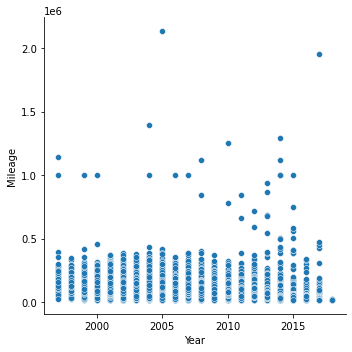

In [37]:
import seaborn as sns
sns.relplot(x="Year", y="Mileage",sizes=(30, 100), alpha=1,height=5, data=DF)

### 4.2 City Importance

In [38]:

grouped=DF.groupby('City')['Price'].mean().sort_values(ascending=False)
grouped


City
RANCHO MIRAGE         63740.000000
REDONDO BEACH         59888.000000
NEWTOWN SQUARE        54235.348837
DFW AIRPORT           52551.483871
HUNTINGTON VALLEY     49908.333333
                          ...     
TUSCON                 5247.600000
BELL                   4936.500000
HIGHLAND SPRINGS       4345.000000
COUNTRY CLUB HILLS     4295.000000
EAST LANDSDOWNE        2435.000000
Name: Price, Length: 2394, dtype: float64

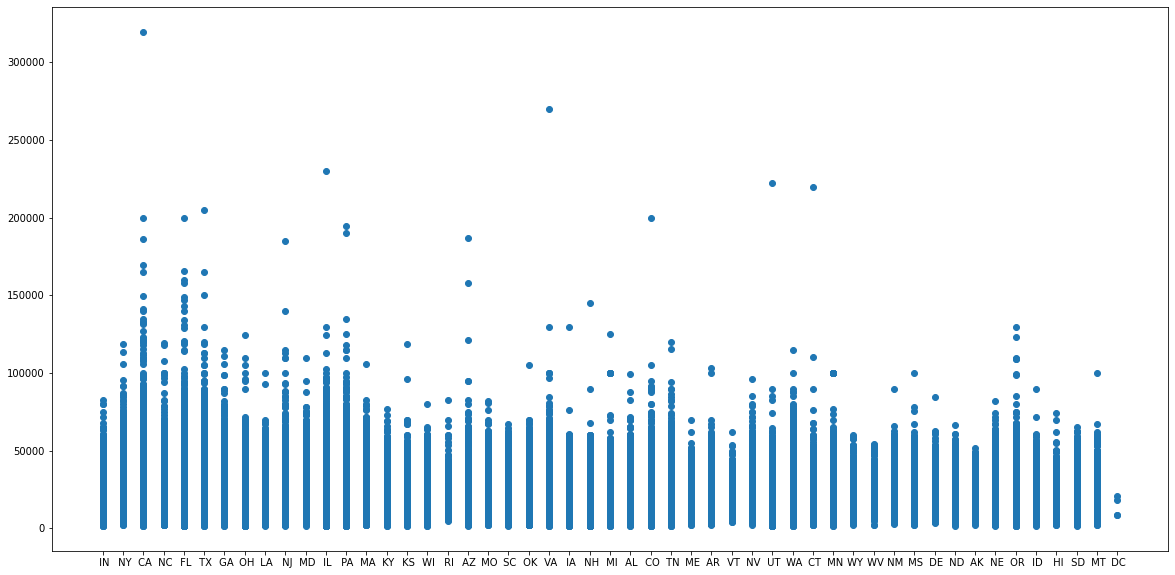

In [39]:
plt.figure(figsize=(20,10))
plt.scatter(x='State',y='Price',data=DF)

# 5 Answers


### 5.1

In [68]:
old_cnt=old_set.groupby(['City']).size().reset_index(name ='Total Amount')
new_cnt=new_set.groupby(['City']).size().reset_index(name ='Total Amount')

[Text(0.5, 1.0, 'Old Set')]

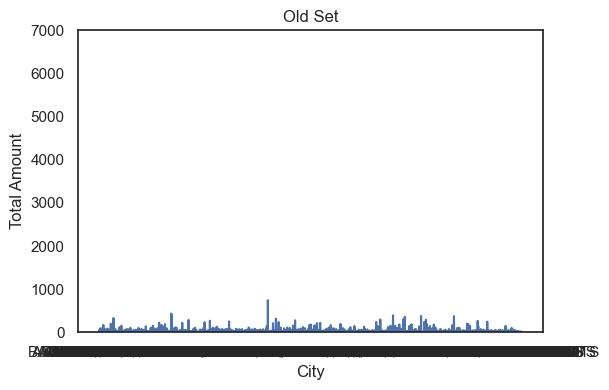

In [74]:
import matplotlib.pyplot as plt
plt.ylim(0, 7000)
sns.lineplot(x='City',y='Total Amount', data=old_cnt ).set(title='Old Set')

[Text(0.5, 1.0, 'New Set')]

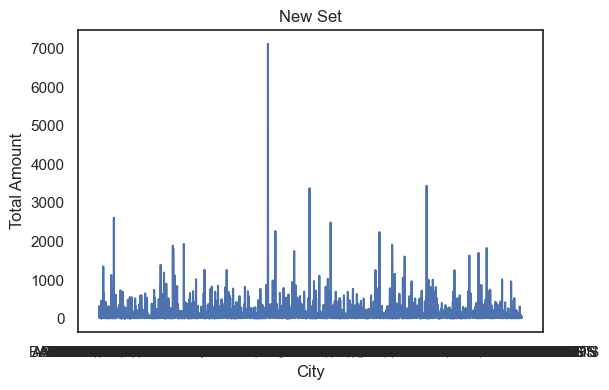

In [73]:
sns.lineplot(x='City',y='Total Amount', data=new_cnt ).set(title='New Set')

### 5.2

In [75]:
old_cnt=old_set.groupby(['State']).size().reset_index(name ='Total Amount')
new_cnt=new_set.groupby(['State']).size().reset_index(name ='Total Amount')

TypeError: 'AxesSubplot' object is not callable

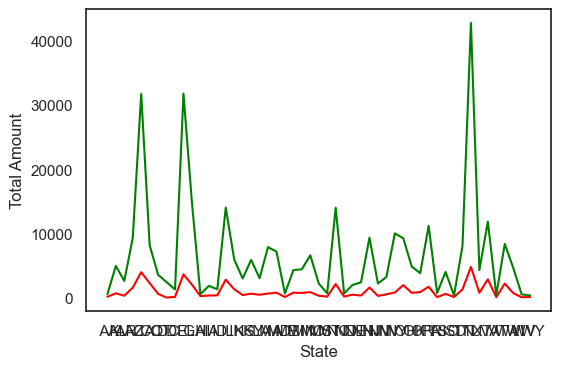

In [80]:
ax = sns.lineplot(x='State',y='Total Amount', data=old_cnt,color='red' )
sns.lineplot(x='State',y='Total Amount', data=new_cnt,color='green' )(ax=ax)
sns.show()

In [44]:
import sweetviz as sv
my_report = sv.analyze(old_set)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [45]:
import sweetviz as sv
my_report = sv.analyze(new_set)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [46]:
# in new set the price increases little bit

In [47]:
# yes the state has a corellation ratio of 0.13

In [48]:
# increases

In [49]:
# no relation between year and milage

<AxesSubplot:xlabel='Year', ylabel='Price'>

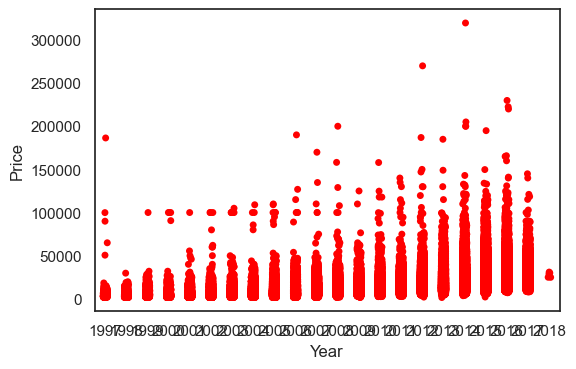

In [84]:
sns.stripplot(x ='Year', y ='Price', data = DF,color='red')

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

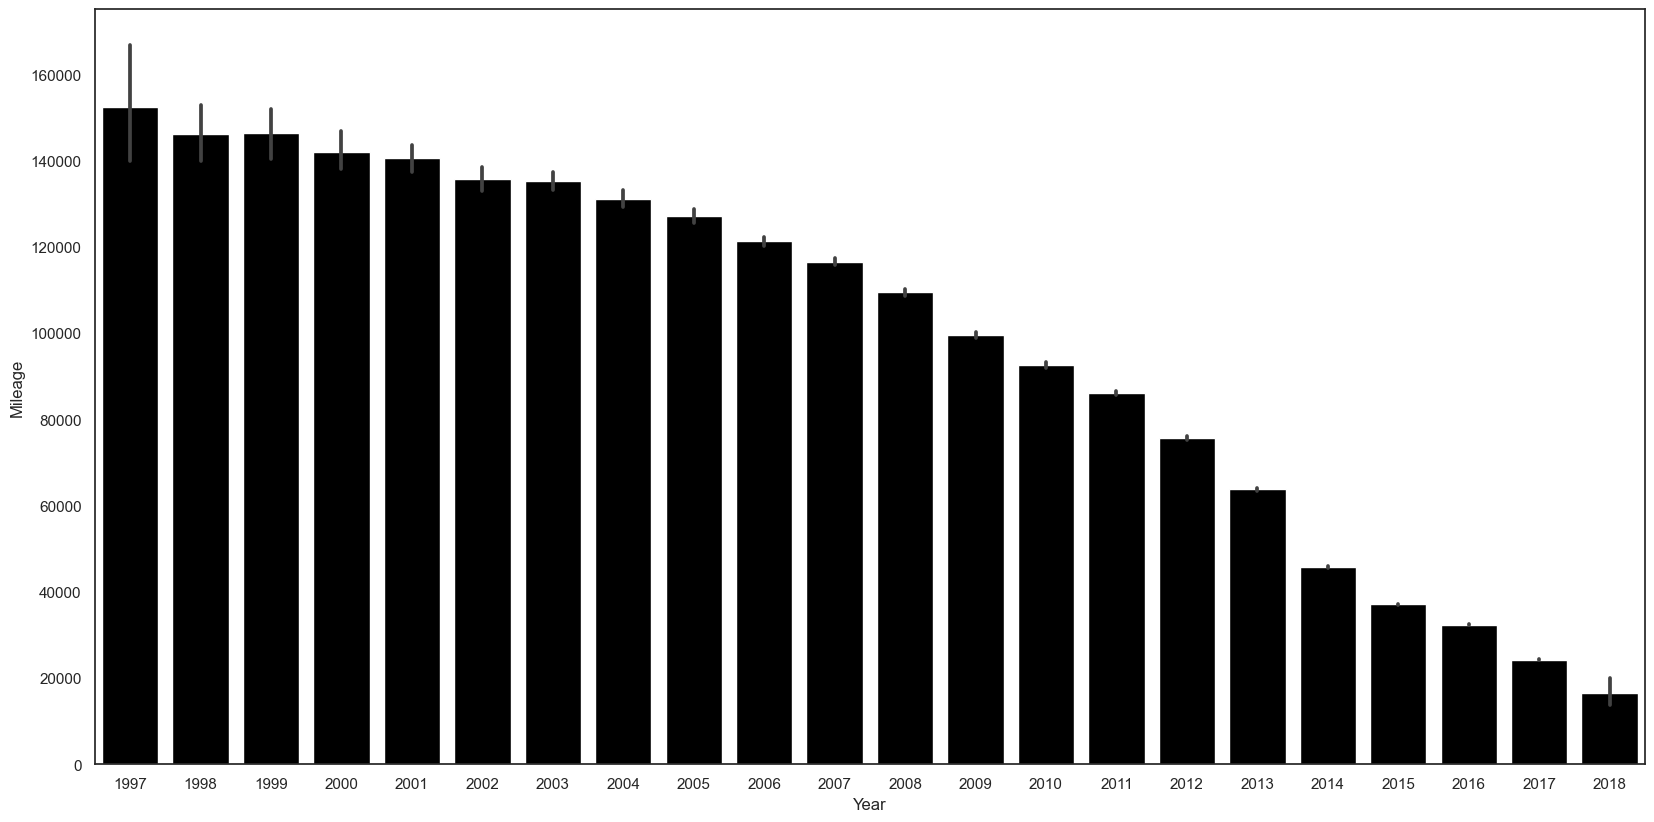

In [85]:
plt.figure(figsize=(20,10))
sns.barplot(data=DF,x='Year',y='Mileage',color='black')